# Starter code for HW6

## For question 1
### 1. SOCP constraints

Specify an SOCP constraint using `SecondOrderCone()`:

In [1]:
using JuMP, Gurobi

m = Model(Gurobi.Optimizer)
# suppress Gurobi output
set_optimizer_attribute(m, "OutputFlag", 0);

@variable(m, x[1:3] >= 0)

# use a constant here, can also be a JuMP variable!
r = 75;

# it means that x1^2 + x2^2 + x3^2 <= r^2
@constraint(m, [r; x] in SecondOrderCone());

@objective(m, Max, sum(x));

m

Academic license - for non-commercial use only - expires 2021-05-07


A JuMP Model
Maximization problem with:
Variables: 3
Objective function type: GenericAffExpr{Float64,VariableRef}
`Array{GenericAffExpr{Float64,VariableRef},1}`-in-`MathOptInterface.SecondOrderCone`: 1 constraint
`VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 3 constraints
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Gurobi
Names registered in the model: x

In [2]:
optimize!(m)
println(value.(x))
# it shows that x1^2 + x2^2 + x3^2 <= 75^2
println(sqrt(sum(value.(x) .^ 2)))

[43.30127018215922, 43.30127018215922, 43.30127018215923]
74.99999998776703


### 2. Plots

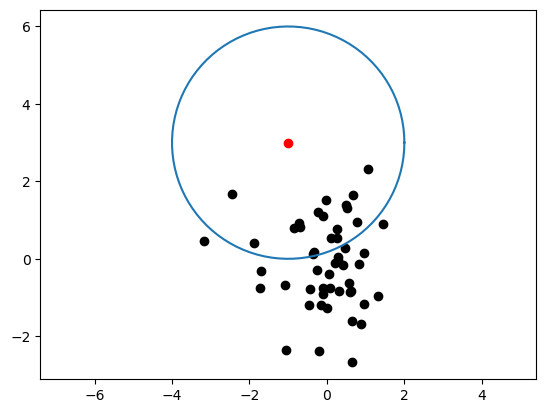

In [3]:
using PyPlot

t = range(0,stop=2π,length=100);
axis("equal");

# two vectors of random numbers(normal distribution)
randX = randn(1, 50);
randY = randn(1, 50);

# draw random scatter points
scatter(randX, randY, color="black");

# draw a circle
r = 3;
cx = -1;
cy = 3;
plot( -1 .+ r *cos.(t), 3 .+ r * sin.(t));

# draw the center of the circle
scatter(cx, cy, color="red");

## For question 2
### Eigen vectors and values

In [4]:
using LinearAlgebra

A = [1 2 3; 4 5 6; 7 8 9]

# use eigvals() to get the eigenvalues of a matrix
eigvals(A)

3-element Array{Float64,1}:
 -1.1168439698070416
 -9.759184829871139e-16
 16.116843969807043

In [5]:
# we can also use eigen() to obtain its eigenvalues and eigenvectors
# here L is the array of eigen values, U is the matrix of eigenvectors
(L, U) = eigen(A)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
3-element Array{Float64,1}:
 -1.1168439698070416
 -9.759184829871139e-16
 16.116843969807043
vectors:
3×3 Array{Float64,2}:
 -0.78583     0.408248  -0.231971
 -0.0867513  -0.816497  -0.525322
  0.612328    0.408248  -0.818673

## For question 3
### 1. Plotting

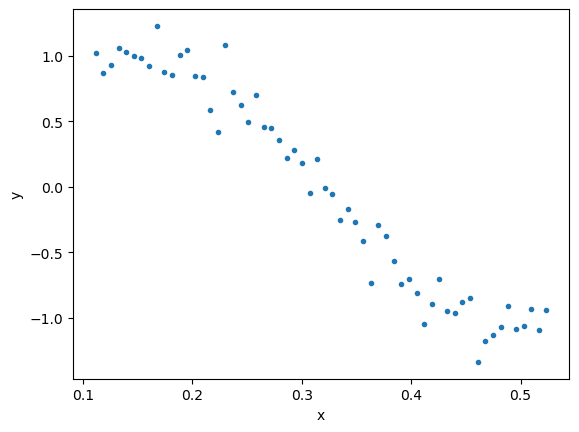

In [6]:
using PyPlot, CSV, DataFrames

data = CSV.read("lasso_data.csv", DataFrame)
x = data[:,1]
y = data[:,2]
plot(x, y, ".");
xlabel("x"); ylabel("y");
n=size(data, 1);

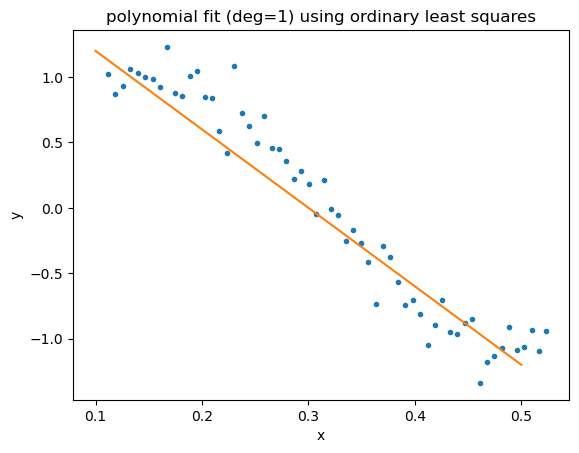

In [7]:
# plot a line on top of it

f(x) = -6 * x + 1.8;

# points of the line
xs = range(0.1, 0.5, length=100);
ys = f.(xs);


# plot the scatters again
plot(x, y, ".");
# plot the line
plot(xs,ys,"-");
title(string("polynomial fit (deg=", 1, ") using ordinary least squares")); # it is not!
xlabel("x"); ylabel("y");

### 2. Logical Indexing

Please refer to [Julia documentation](https://docs.julialang.org/en/v1/manual/arrays/#Logical-indexing) for details.

In [8]:
M = [1 2 3; 4 5 6; 7 8 9];

# select elements that are prime

function is_prime(x)
    if x == 1
        return false;
    end
    
    for i in 2:sqrt(x)
        if mod1(x, i) == i
            return false;
        end
    end
    return true;
end

is_prime_M = is_prime.(M)

3×3 BitArray{2}:
 0  1  1
 0  1  0
 1  0  0

In [9]:
# select primes in M using is_prime_M
M[is_prime_M]

4-element Array{Int64,1}:
 7
 2
 5
 3

In [10]:
# you can also obtain the coordinates of the true values
prime_indices = findall(is_prime.(M))

4-element Array{CartesianIndex{2},1}:
 CartesianIndex(3, 1)
 CartesianIndex(1, 2)
 CartesianIndex(2, 2)
 CartesianIndex(1, 3)

In [11]:
# and use it to index M
M[prime_indices] 

4-element Array{Int64,1}:
 7
 2
 5
 3